# Lesson 24: Histogram

---

### Teacher-Student Tasks

In the previous classes, we learned how to create a count plot. In this class, we will learn another type of graph called a histogram.

A histogram is very similar to a count plot. It also shows the count of values. However, unlike the discrete counts in a count plot, a histogram shows the continuous counts of values. You will get a better understanding once we start creating a histogram.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Task 1: Count Plot** section.



---

#### Recap

Dataset Link (don't click on it):

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


**Dataset Credits:** https://www.kaggle.com/nasa/meteorite-landings

In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame. 
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


---

#### Task 1: Count Plot

Recall that in the previous class we couldn't draw count plots for all the meteorites found in a year. We had to divide the years in the 20 to 30 years period and then draw the count plot. The count plot works well when you want to look at the variation in the count of a feature across a category. E.g., we observed that the count of `Valid` meteorites was more than the count of the `Relict` meteorites for a year. So, this is where the count plots are helpful.

However, if you want to observe the count trend in one single graph, then, in that case, it is better to create a histogram. 

*A histogram is a type of bar graph that plots the data falling in the same interval together.* Let's understand a histogram through an example.

Consider the count of the meteorites between the years `1970` and `2000`. Let's create a count plot for this period:

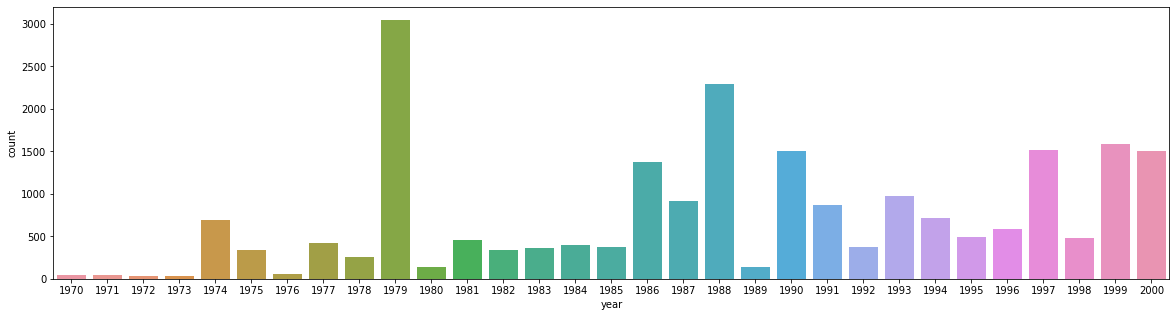

In [ ]:
# S1.1: Create a count plot for the count of the meteorites between the years 1970 and 2000.
import seaborn as sns

# Create a DataFrame for the meteorites fallen between 1970 and 2000 including both.
met_bet_1970_and_2000_df = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] <= 2000)]

# Create a count plot for the meteorites fallen between 1970 and 2000 including both.
plt.figure(figsize=(20, 5))
sns.countplot(x='year', data=met_bet_1970_and_2000_df)
plt.show()

Now, suppose we want to plot a bar graph for the count of the number of meteorites fallen in 5 years between 1970 and 2000. In this case, we will have 6 intervals. They are:

1. 1970 to 1975 (excluding 1975)

2. 1975 to 1980 (excluding 1980)

3. 1980 to 1985 (excluding 1985)

4. 1985 to 1990 (excluding 1990)

5. 1990 to 1995 (excluding 1995)

6. 1995 to 2000 (**including** 2000)

To create bar graphs for such intervals, we will use a histogram. Let us learn how to create histograms in Python. 

---

#### Task 2: Histogram Using the `hist()` Function

The bars in the count plot merge to form one bar in the histogram. So, for the interval:

1. 1970 to 1975 (excluding 1975), the bars in a count plot for the years 1970, 1971, 1972, 1973, and 1974 will merge to form one bar in a histogram.

2. 1975 to 1980 (excluding 1980), the bars in a count plot for the years 1975, 1976, 1977, 1978, and 1979 will merge to form one bar in a histogram.

3. 1980 to 1985 (excluding 1985), the bars in a count plot for the years 1980, 1981, 1982, 1983, and 1984 will merge to form one bar in a histogram.

4. 1985 to 1980 (excluding 1990), the bars in a count plot for the years 1985, 1986, 1987, 1988, and 1989 will merge to form one bar in a histogram.

5. 1990 to 1995 (excluding 1995), the bars in a count plot for the years 1990, 1991, 1992, 1993, and 1994 will merge to form one bar in a histogram.

6. 1995 to 2000 (**including** 2000), the bars in a count plot for the years 1995, 1996, 1997, 1998, and 2000 will merge to form one bar in a histogram.

To create a histogram, you can use the `hist()` function which exists in the `matplotlib.pyplot` library. The `hist()` function requires a one-dimensional array/list/series as an input to create a histogram. Let's create a histogram for the Pandas series which contains the year values between 1970 and 2000 including both of them, i.e., 

`correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)]`


In [ ]:
# S2.1: Create a Pandas series containing the year values between 1970 and 2000 including both of them.
met_bet_1970_and_2000_df = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001),'year']
met_bet_1970_and_2000_df

3        1976
10       1974
16       1981
31       1977
41       1971
         ... 
45709    1981
45710    1990
45711    1990
45712    1999
45715    1976
Name: year, Length: 22368, dtype: int64

So, we have sliced the `correct_lat_long_df` DataFrame to obtain a Pandas series containing the year values between the years 1970 and 2000. **Since for every meteorite, we have recorded its fall year. Hence, the number of year values is equal to the number of meteorites fallen on Earth.**

Now let's create a histogram for the meteorites fallen between 1970 and 2000 using the `hist()` function. Perform the following tasks to create this histogram:

1. Provide following two inputs to the `hist()` function:

  - The Pandas series `met_bet_1970_and_2000_series` for which the histogram needs to be created.
  - The `bins` value. This value defines the number of bars to be created in the histogram. As we are going to create 6 bars, hence pass `bins=6` as the second input to the `hist()` function.

2. Use `grid()` function to show the grid lines.

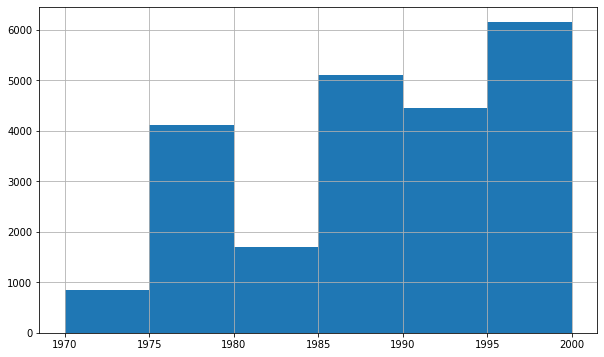

In [ ]:
# S2.2: Create a histogram for the Pandas series containing the year values between 1970 and 2000 including both of them.
plt.figure(figsize=(10,6))
plt.hist(met_bet_1970_and_2000_df,bins=6)
plt.grid()
plt.show()

In the histogram above, on the horizontal axis, we have the year values and on the vertical axis, we have the count of the meteorites fallen to Earth including both `Fell` & `Found` meteorites. So from the histogram, we can say that: 

1. Just below 1000 meteorites fell on Earth from 1970 to 1975 (excluding 1975).

2. Just over 4000 meteorites fell on Earth from 1975 to 1980 (excluding 1980).

3. Just below 2000 meteorites fell on Earth from 1980 to 1985 (excluding 1985).

4. Just over 5000 meteorites fell on Earth from 1985 to 1990 (excluding 1990).

5. Just below 4500 meteorites fell on Earth from 1990 to 1995 (excluding 1995).

6. Just over 6000 meteorites fell on Earth from 1995 to 2000 (**including** 2000).


---

#### Task 3: The `sum()` Function

We can find the actual number of meteorites that fell on Earth in each of the six intervals using the `sum()` function which exists in the Pandas module.

**Note:** The number of meteorites that fell on Earth is equal to the number of year values.

To do this exercise, first, obtain a Pandas series containing the year values for each interval of 5-years using the `loc[]` function. E.g.,

```python
correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year']
```

Then apply the `value_counts()` function followed by the `sum()` function. The `value_counts()` function will return another Pandas series containing the count of year values in the 5 year interval. The `sum()` function will return the sum of all counts. E.g.,

```python
correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year'].value_counts().sum()
```

In [ ]:
# S3.1: Find the actual number of meteorites fell on Earth in each of the six intervals.
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 1975), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1975) & (correct_lat_long_df['year'] < 1980), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1980) & (correct_lat_long_df['year'] < 1985), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1985) & (correct_lat_long_df['year'] < 1990), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1990) & (correct_lat_long_df['year'] < 1995), 'year'].value_counts().sum())
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1995) & (correct_lat_long_df['year'] <= 2000), 'year'].value_counts().sum())


846
4116
1708
5098
4448
6152


Therefore, 

- 846 meteorites fell on Earth from 1970 to 1975 (excluding 1975)

- 4116 meteorites fell on Earth from 1975 to 1980 (excluding 1980)

- 1708 meteorites fell on Earth from 1980 to 1985 (excluding 1985)

- 5098 meteorites fell on Earth from 1985 to 1990 (excluding 1990)

- 4448 meteorites fell on Earth from 1990 to 1995 (excluding 1995)

- 6152 meteorites fell on Earth from 1995 to 2000 (**including** 2000)


There's an alternate way to do the above exercise. Create a `while` loop to iterate through each interval of 5 years to count the number of years in each interval:


In [ ]:
# S3.2: Create a 'while' loop to iterete through first 5 intervals to obtain the count of the meteorites fallen.
year = 1970
while(year < 1995):
  print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= year) & (correct_lat_long_df['year'] < (year+5)), 'year'].value_counts().sum())
  year += 5
print(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= year) & (correct_lat_long_df['year'] < (year+6)), 'year'].value_counts().sum())
  


# For the last interval, we want to include the counts of the year '2000'. Hence, let's print the required counts without using the 'while' loop.


846
4116
1708
5098
4448
6152


Here the output shows the actual number of meteorites that fell on Earth between the years 1970 to 2000.

---

#### Task 4: Histogram Using the `distplot()` Function

We can also create a histogram using the `distplot()` function from the `seaborn` module. The term `distplot` stands for distribution plot. It also takes a Pandas series / NumPy array / Python list as an input. The other inputs that you can provide are `bins` and `kde` values. The `kde` parameter takes a boolean value, i.e., either `True` or `False`. Let's set the `bins` parameter equal to `6` and the `kde` parameter equal to `False` in the `distplot()` function. We will learn about the `kde` parameter later.

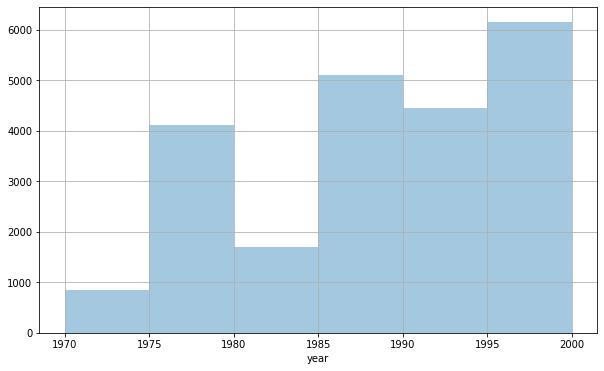

In [ ]:
# S4.1: Create a histogram using the 'distplot()' function from the seaborn library.
plt.figure(figsize=(10,6))
sns.distplot(met_bet_1970_and_2000_df,bins=6,kde=False)
plt.grid()
plt.show()

As you can see, we have created the same histogram using the `distplot()` function. **The `distplot()` function is smarter in terms of choosing the appropriate default number of bins**. Hence, it is best to create a histogram using the `distplot()` function over the `hist()` function. 

Now, let's create a histogram to see the distribution of the fall of meteorites over the years starting from the year `860`:

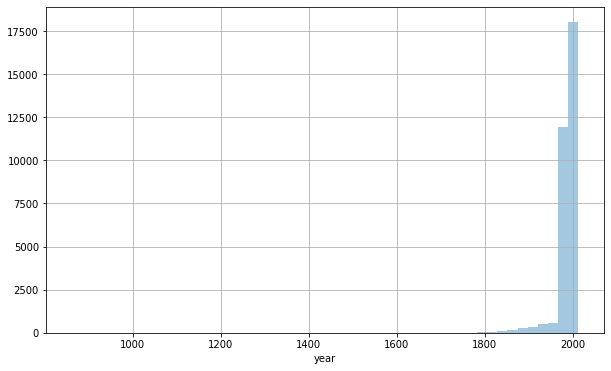

In [ ]:
# S4.2: Create a histogram for the 'year' column in the 'correct_lat_long_df' DataFrame using the 'distplot()' function.
plt.figure(figsize=(10,6))
sns.distplot(correct_lat_long_df['year'],kde=False)
plt.grid()
plt.show()

If you look at the graph, the number of meteorites fallen to Earth is almost 0 till the year 1800. After that, there is some increase but it is very little. After 1900, the is a rapid increase in the number of meteorites falling to Earth. 

Let's closely observe the period after 1900 to see the variation in the number of meteorites falling to Earth by creating another histogram:

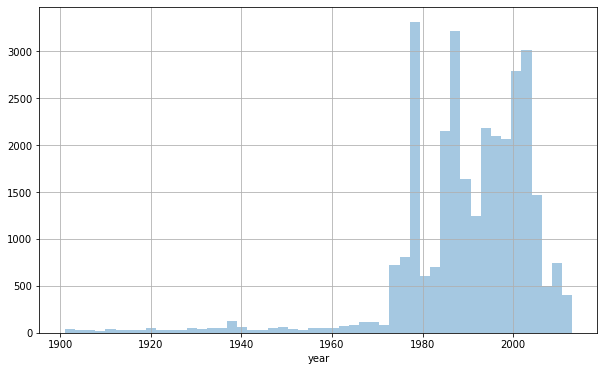

In [ ]:
# S4.3: Create a histogram to visualise the number of meteorites fallen after the year 1900 using the 'distplot()' function.
plt.figure(figsize=(10,6))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year'] > 1900,'year'],kde=False)
plt.grid()
plt.show()

If you increase the size of the bins, the width of the bars will decrease whereas if you decrease the size of the bins, the width of the bars will increase.

Let's recreate the above histogram with bin size set to `25`:


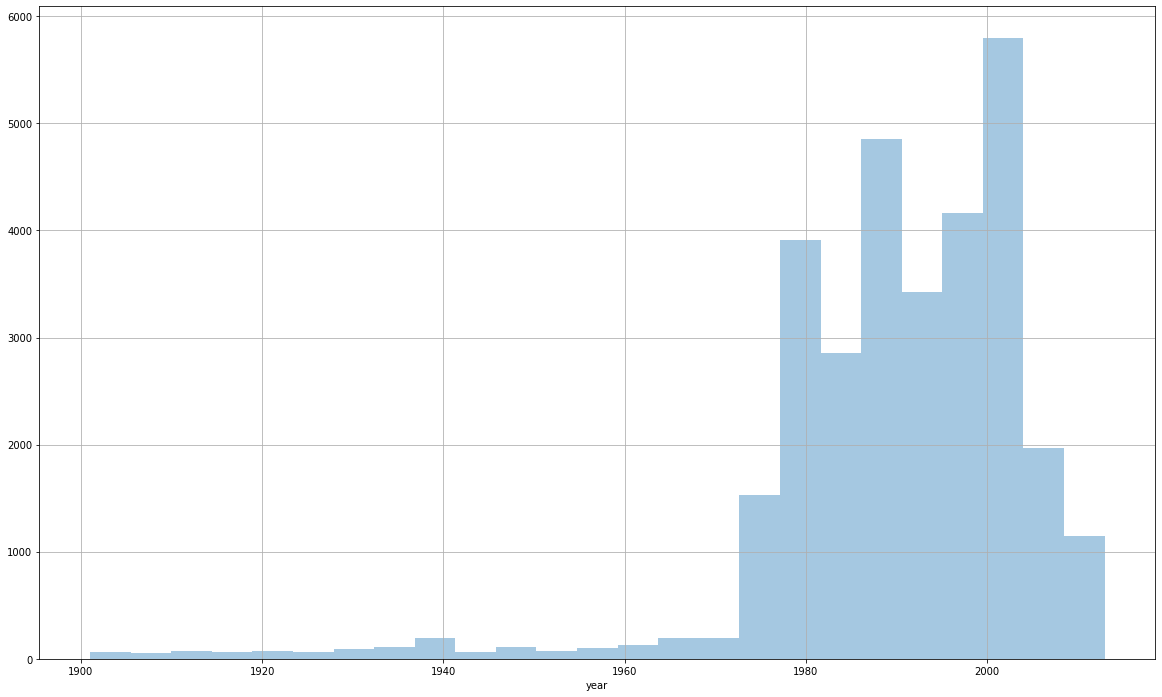

In [ ]:
# S4.4: Set the bins size equal to 25 in the previous histogram.
plt.figure(figsize=(20,12))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year'] > 1900,'year'],bins=25,kde=False)
plt.grid()
plt.show()

Now set the bin size to `100` and recreate the above histogram:

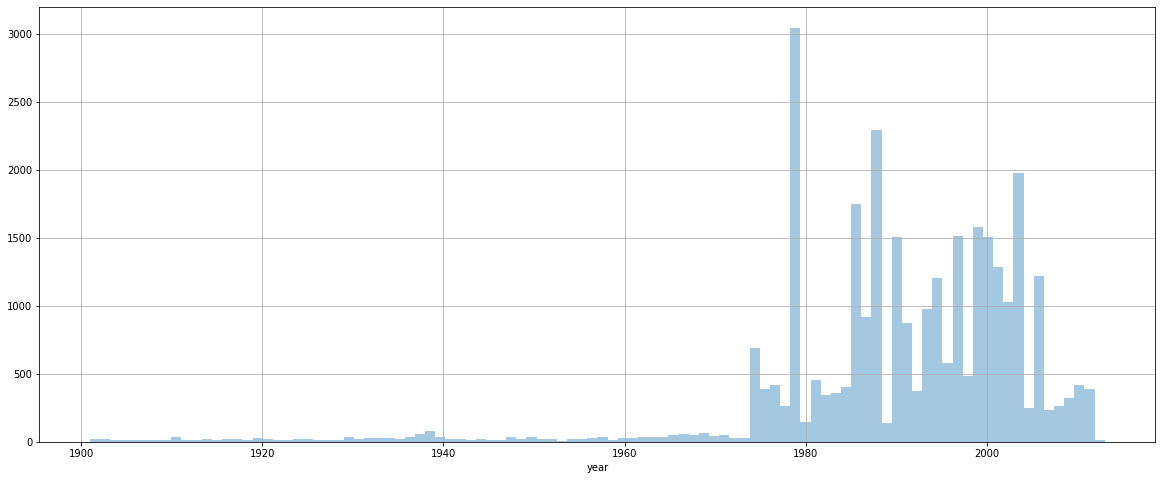

In [ ]:
# S4.5: Set the bins size equal to 100 in the previous histogram.
plt.figure(figsize=(20,8))
sns.distplot(correct_lat_long_df.loc[correct_lat_long_df['year'] > 1900,'year'],bins=100,kde=False)
plt.grid()
plt.show()

Thus, we can create histogram using `distplot()` function by setting the desired bin size.

---

#### Task 5: Meteorite Class-wise Histograms

Let's create a meteorite class-wise histogram to observe the trend of the fall of meteorites belonging to a class. But first, let's find out the number of unique classes of meteorites present in the dataset and the count of their falls:

In [ ]:
# S5.1: Calcuate the number of unique class of meteorites.
len(correct_lat_long_df['recclass'].unique())

394

So there are 394 different classes of meteorites. Let's compute the counts for each class of meteorite using the `value_counts()` function:

In [ ]:
# S5.2: Count of the fall of the different class of meteorites.
met_class_count = correct_lat_long_df['recclass'].value_counts()

The `value_counts()` function returns a Pandas series. Let's store the series in a variable to do further analysis:

In [ ]:
# S5.3: Store the 'correct_lat_long_df['recclass'].value_counts()' Pandas series in a new variable.


Since there are 394 unique meteorite classes, it's not too useful to create a histogram for every single one of them. Let's create a histogram for the top ten class of meteorites to see if there is any kind of similarity in the pattern of their falls:

In [ ]:
# S5.4: Display the top 10 most number of class of meteorites fallen on Earth.
met_class_count[:10].index

Index(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5', 'LL6', 'L4', 'H4/5', 'CM2'], dtype='object')

Let's plot the histograms for the top 10 most number of fallen meteorite classes using the `hist()` function. Make sure that each histogram has exactly 50 bins:

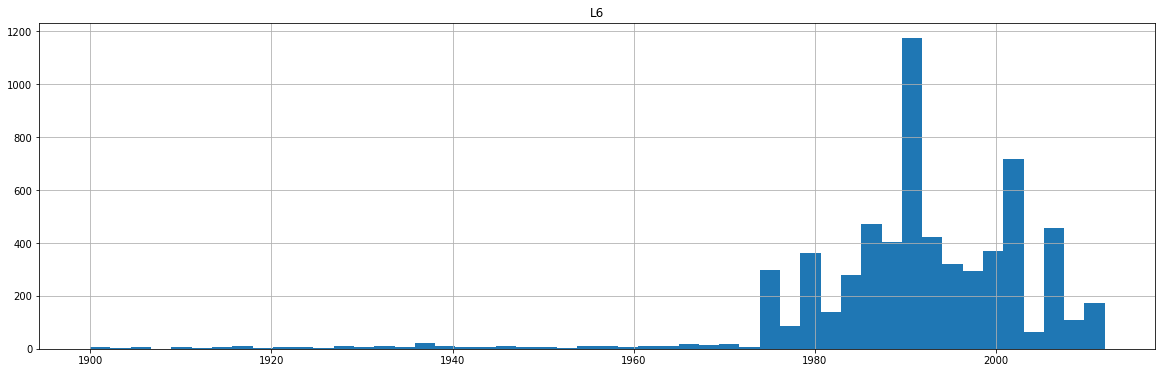

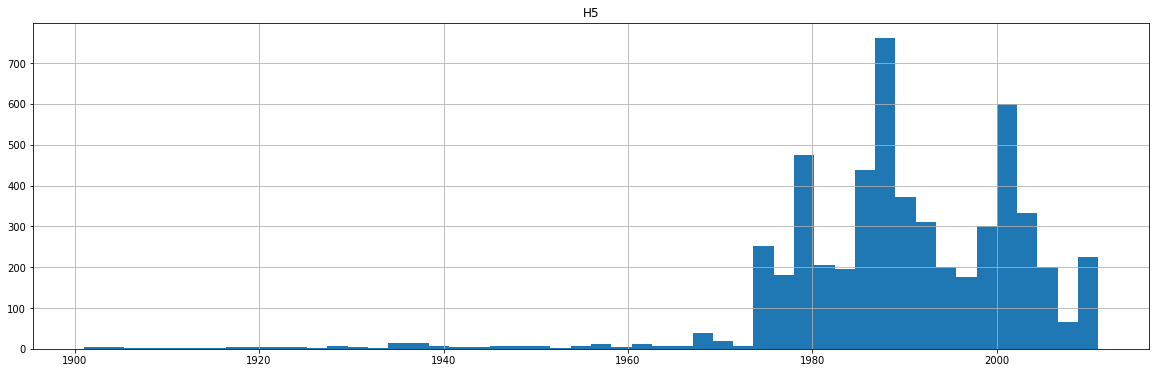

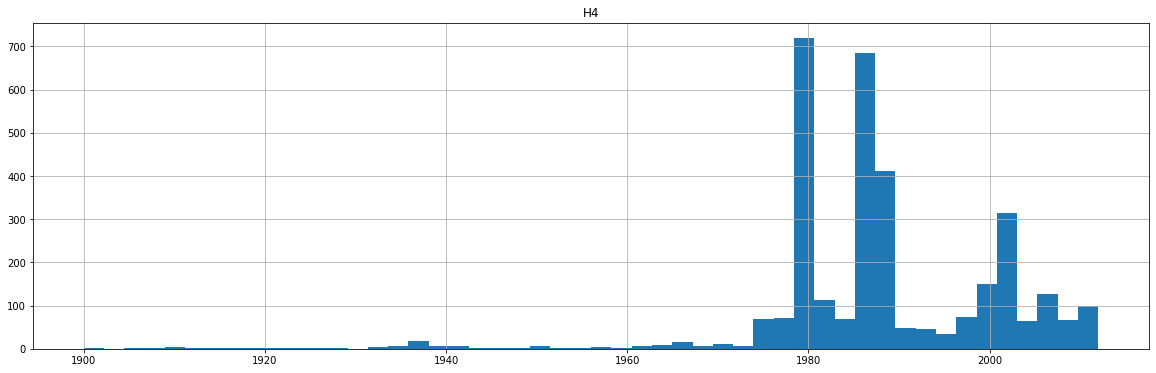

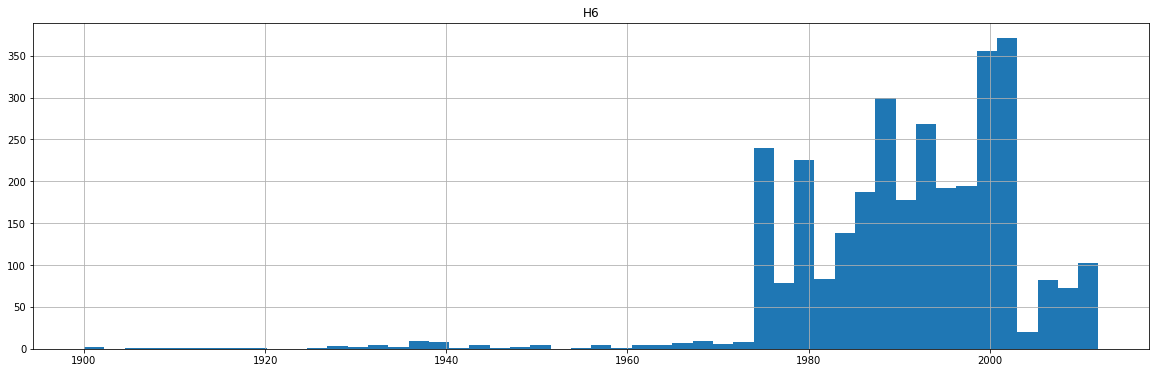

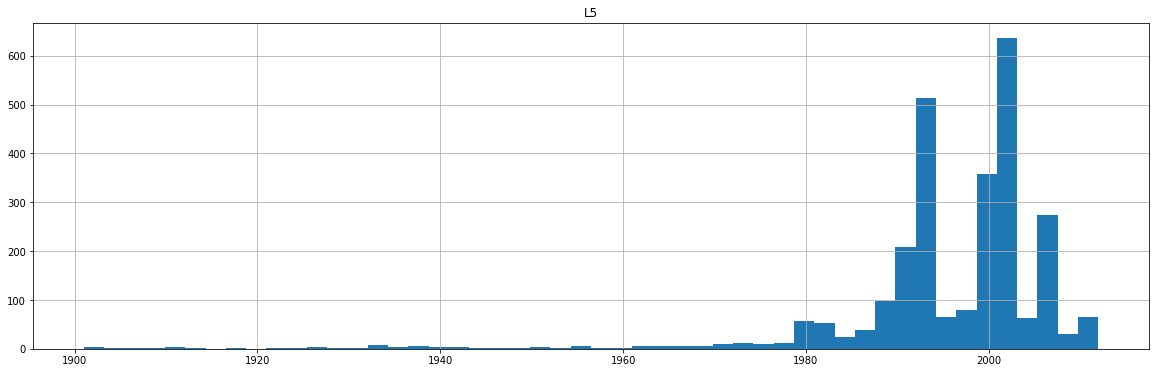

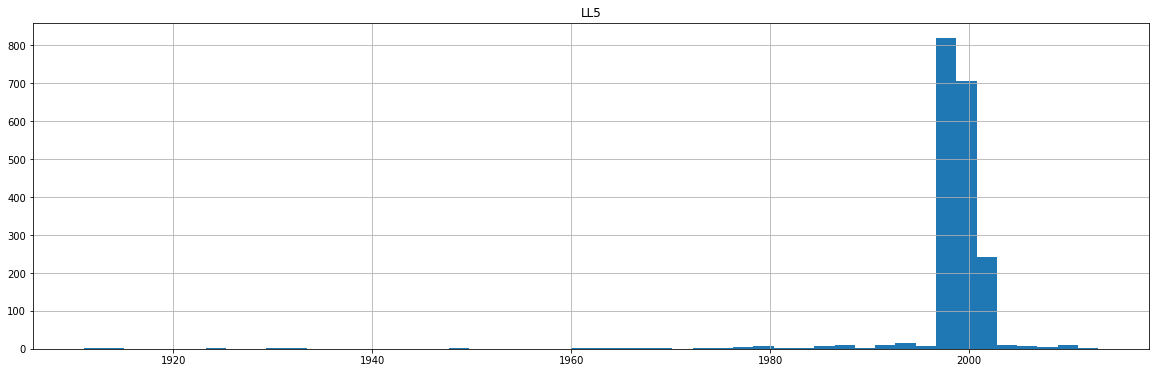

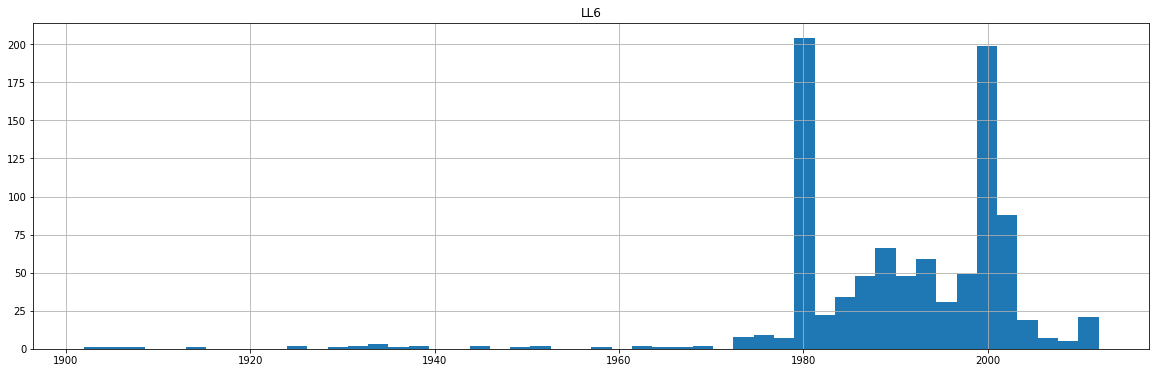

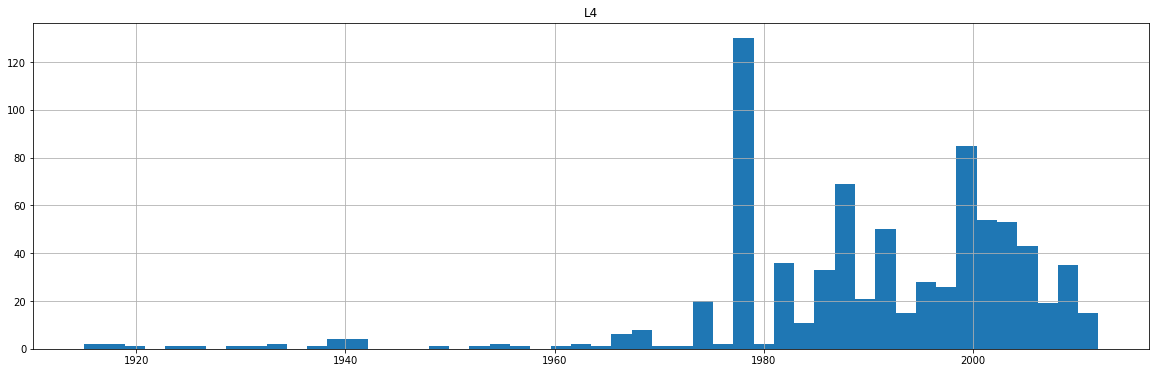

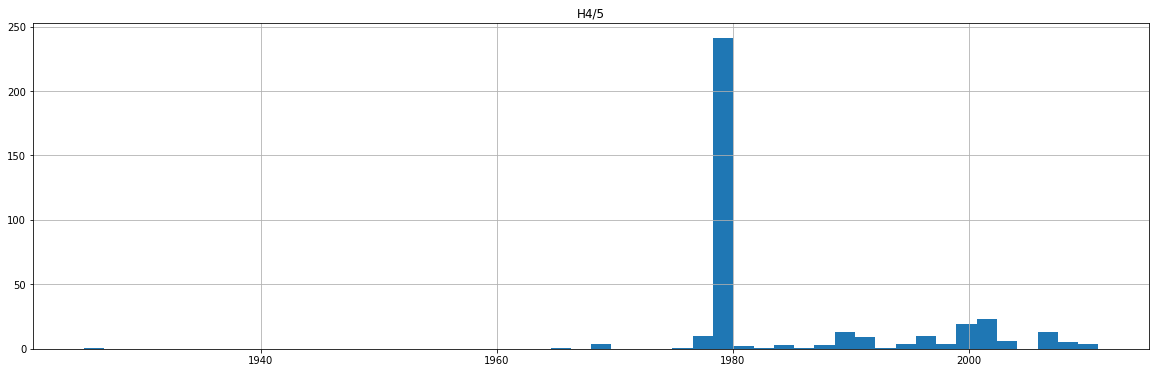

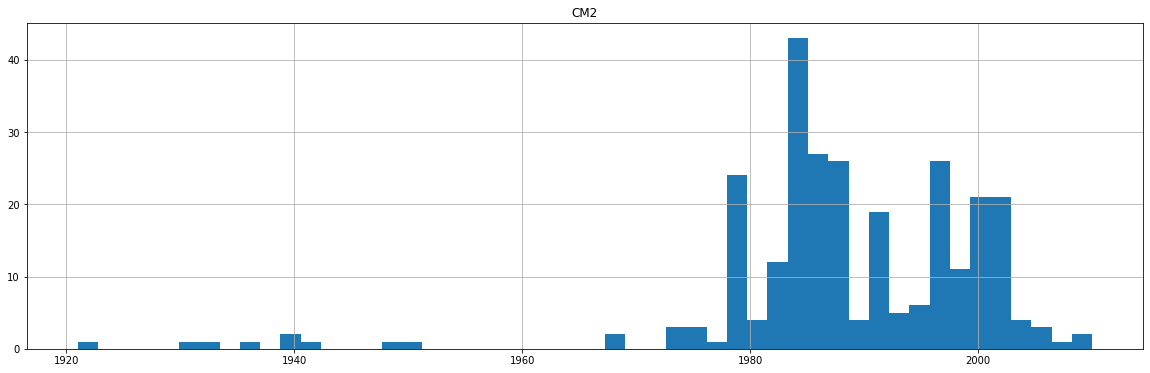

In [ ]:
# S5.5: Plot the histograms for the top 10 most number of fallen meteorite classes using the 'hist()' function.

for i in met_class_count[:10].index:
  plt.figure(figsize=(20,6))
  plt.title(i)
  plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['recclass'] == i) & (correct_lat_long_df['year'] >= 1900),'year'],bins=50)
  plt.grid()
  plt.show()

There is no definite recognizable pattern in the fall of the meteorites over the years for a class of a meteorite. 

The only concrete observation that we can make from the histograms is that the most number of `LL5` class meteorites fell between the years 1995 and 2005 and the most number of the `H4/5` class meteorites fell between the years 1975 and 1980. 

That's it for now. In the next class, we will learn how to add additional information such as the counts of the meteorites in the histograms and count plots.

---